In [15]:
# GLOBAL PARAMETERS
data_path = '/Volumes/Samsung_SSD'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pydicom
from glob import glob
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import warnings
warnings.filterwarnings('ignore')

In [3]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data
        
    
def plot_img(img, size=(7, 7), is_rgb=True, title="", cmap='gray'):
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()


def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()
    
# def draw_bboxes(img, boxes, thickness=10, color=(255, 0, 0), img_size=(500,500)):
#     img_copy = img.copy()
#     if len(img_copy.shape) == 2:
#         img_copy = np.stack([img_copy, img_copy, img_copy], axis=-1)
#     for box in boxes:
#         img_copy = cv2.rectangle(
#             img_copy,
#             (int(box[0]), int(box[1])),
#             (int(box[2]), int(box[3])),
#             color, thickness)
#     if img_size is not None:
#         img_copy = cv2.resize(img_copy, img_size)
#     return img_copy

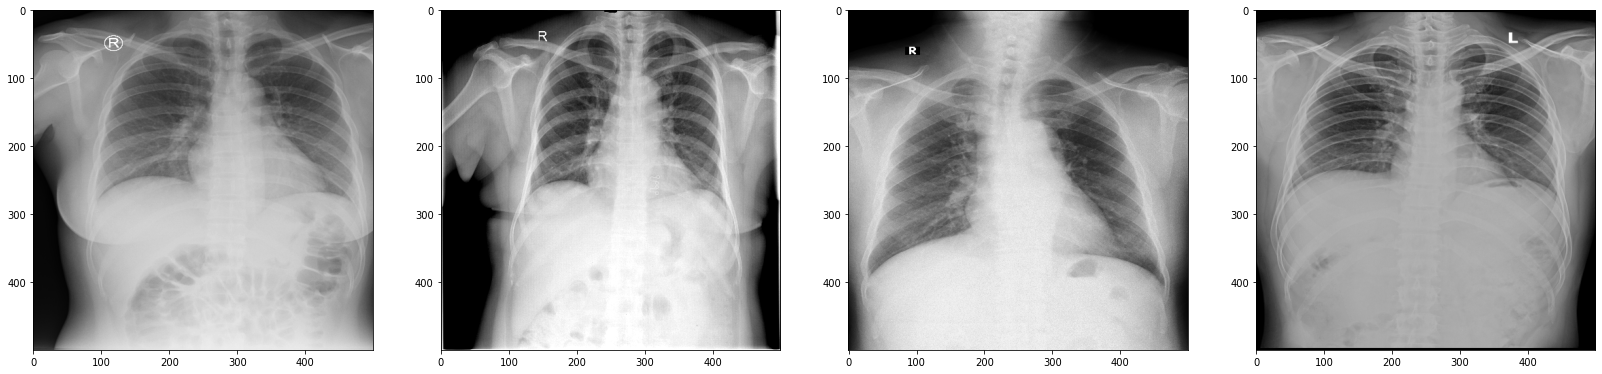

In [4]:
dicom_paths = glob(f'{data_path}/train/*.dicom')
imgs = [dicom2array(path) for path in dicom_paths[:4]]
plot_imgs(imgs)

In [11]:
def dicom_meta_data(path):
    dicom = pydicom.read_file(path)
    print('---KEYS----')
    print(dicom.keys())
    print('---DICOM----')
    print(dicom)
    print('------------\n\n\n')
    return None

In [12]:
dicom_paths = glob(f'{data_path}/train/*.dicom')
imgs = [dicom_meta_data(path) for path in dicom_paths[:1]]

---KEYS----
dict_keys([(0010, 0040), (0010, 1010), (0028, 0002), (0028, 0004), (0028, 0010), (0028, 0011), (0028, 0030), (0028, 0034), (0028, 0100), (0028, 0101), (0028, 0102), (0028, 0103), (0028, 0106), (0028, 0107), (0028, 1050), (0028, 1051), (0028, 1052), (0028, 1053), (0028, 2110), (7fe0, 0010)])
---DICOM----
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 172
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: f7f7736401b22c94a9d2b09425adeab9
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'INF_3.9'
(0002, 0016) Source Application Entity Title     AE: 'console5800'
-------------------------------------